## Testing some python codes

# Load standard behavior and neural data

In [2]:
# cd to neuro-behavior/src directory, and add the figure_tools package folder to path
import os
os.chdir('E:/Projects/neuro-behavior/src/')
import sys
sys.path.append('E:/Projects/')
import figure_tools as ft
from neurobehavior.neuro_behavior_options import neuro_behavior_options
import matplotlib.pyplot as plt


In [3]:
# make any options changes
opts = neuro_behavior_options()
opts['frameSize'] = .05
opts['collectFor'] = 45 * 60

%run -i get_standard_data.py

Behavior -1.0: in_nest_sleeping_or_irrelevant
244: allPossible
218: andLongEnough
177: andNotRepeated
Percent valid: 72.5

Behavior 0.0: investigate_1
256: allPossible
246: andLongEnough
202: andNotRepeated
Percent valid: 78.9

Behavior 1.0: investigate_2
927: allPossible
878: andLongEnough
449: andNotRepeated
Percent valid: 48.4

Behavior 2.0: investigate_3
116: allPossible
110: andLongEnough
83: andNotRepeated
Percent valid: 71.6

Behavior 3.0: rear
32: allPossible
31: andLongEnough
26: andNotRepeated
Percent valid: 81.2

Behavior 4.0: dive_scrunch
114: allPossible
107: andLongEnough
97: andNotRepeated
Percent valid: 85.1

Behavior 5.0: paw_groom
100: allPossible
98: andLongEnough
66: andNotRepeated
Percent valid: 66.0

Behavior 6.0: face_groom_1
210: allPossible
200: andLongEnough
127: andNotRepeated
Percent valid: 60.5

Behavior 7.0: face_groom_2
135: allPossible
130: andLongEnough
74: andNotRepeated
Percent valid: 54.8

Behavior 8.0: head_groom
140: allPossible
134: andLongEnough


E:\Projects\neuro-behavior\src\get_standard_data.py:127: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataBhv.StartFrame = 1 + np.floor(dataBhv.StartTime / opts['frameSize'])
E:\Projects\neuro-behavior\src\get_standard_data.py:128: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataBhv.DurFrame = np.floor(dataBhv.Dur / opts['frameSize'])


# Pacmap
[github link](https://github.com/YingfanWang/PaCMAP)

In [4]:
idInd = idDS

In [4]:
import pacmap

X = dataMat[:, idDS]
# X = X.reshape(X.shape[0], -1)
y = bhvIDMat

# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X, init="pca")

### Visualize Pacmap

In [18]:
%matplotlib qt5
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

bhvColors = ft.colors_for_behaviors(behaviors)
# Prepare colors: Map each label to its RGB color
bhvIDMatColors = bhvIDMat + 1
colors = np.array([bhvColors[label] for label in bhvIDMatColors])  # Adjust indexing if necessary

# The third dimension (Z) is a sequence from 1 to dataMat.shape[0]
z = np.arange(1, dataMat.shape[0] + 1)

# visualize the embedding
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_transformed[:, 0], X_transformed[:, 1], z, color=colors, s=10, 
           marker='o', linewidths=1.5, facecolors='none')
ax.set_title('PACMAP projection of the dataMat dataset', fontsize=24)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.tight_layout()

plt.show()


# UMAP

In [5]:
import umap

# Initialize UMAP. You can adjust the parameters as needed.
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')

# Fit the model to your data
embedding = reducer.fit_transform(dataMat[:, idInd])

### Visualize UMAP

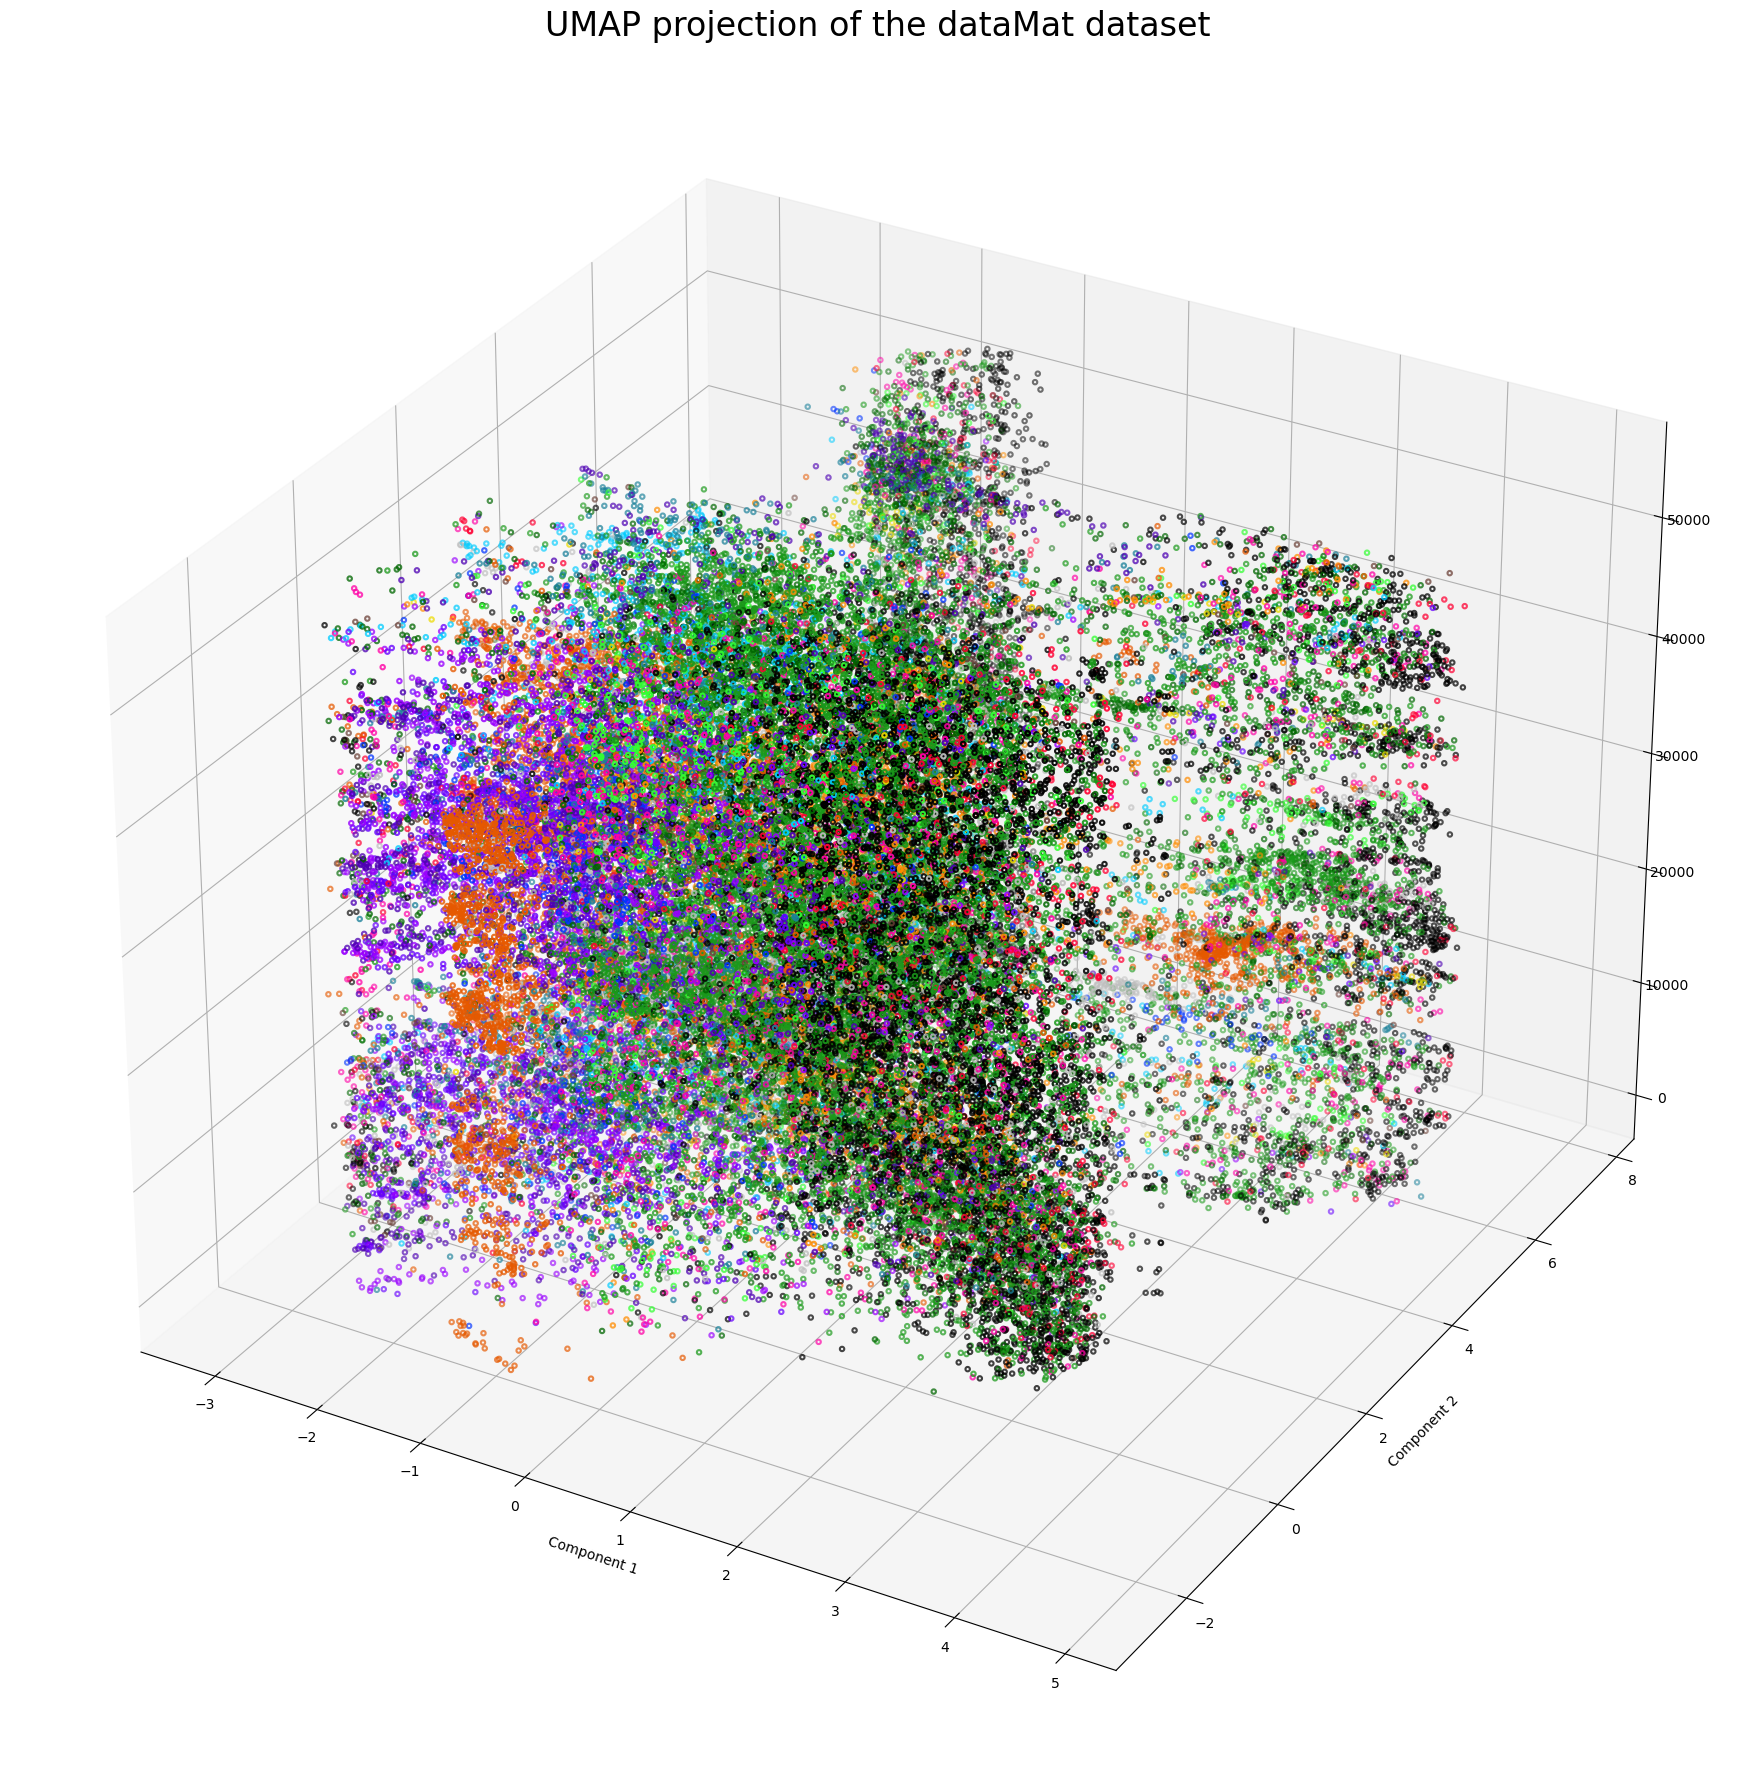

In [6]:
import matplotlib.pyplot as plt

bhvColors = ft.colors_for_behaviors(behaviors)
# Prepare colors: Map each label to its RGB color
bhvIDMatColors = bhvIDMat + 1
colors = np.array([bhvColors[label] for label in bhvIDMatColors])  # Adjust indexing if necessary

# The third dimension (Z) is a sequence from 1 to dataMat.shape[0]
z = np.arange(1, dataMat.shape[0] + 1)

# Plotting the result
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(embedding[:, 0], embedding[:, 1], z, color=colors, s=10, 
           marker='o', linewidths=1.5, facecolors='none')
ax.set_title('UMAP projection of the dataMat dataset', fontsize=24)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

plt.tight_layout()
plt.show()


In [7]:
from neurobehavior.find_unique_sequences import find_unique_sequences

nSeq = 3
validInd = [0, 1, 0]
uniqueSequences, sequenceIndices = find_unique_sequences(dataBhv, nSeq, validInd)
print("Unique Sequences:", uniqueSequences)
print("Sequence Indices:", sequenceIndices)

ValueError: invalid literal for int() with base 10: '8.0'